In [4]:
from ipywidgets import widgets 
from IPython.display import display
from IMP import *
from tools import sort_dict

text = widgets.Text()
button = widgets.Button(description='Click Me')
display(text)
display(button)
s = None

def hdl(sender):
    print(sender.value)

def btn(sender):
    print(sort_dict(sender.__dict__))
    
def f(x):
    return x
a = widgets.interact(f, x=(1,10,1e-6))

text.on_submit(hdl)
button.on_click(btn)
a

5.0

<function __main__.f>

OrderedDict([('_click_handlers', <ipywidgets.widgets.widget.CallbackDispatcher object at 0x6f0904f0>), ('_cross_validation_lock', False), ('_model_id', 'f7891de58b884ac887b91d2a5e28e254'), ('_trait_notifiers', {'border_style': {'change': [<traitlets.traitlets.ObserveHandler object at 0x74a435d0>, <function DOMWidget._deprecate_traits.<locals>.traitWarn at 0x6f0802b8>]}, 'font_size': {'change': [<function DOMWidget._deprecate_traits.<locals>.traitWarn at 0x6f0802b8>]}, 'font_family': {'change': [<function DOMWidget._deprecate_traits.<locals>.traitWarn at 0x6f0802b8>]}, 'font_style': {'change': [<function DOMWidget._deprecate_traits.<locals>.traitWarn at 0x6f0802b8>]}, 'visible': {'change': [<function DOMWidget._deprecate_traits.<locals>.traitWarn at 0x6f0802b8>]}, 'color': {'change': [<function DOMWidget._deprecate_traits.<locals>.traitWarn at 0x6f0802b8>]}, 'border_color': {'change': [<traitlets.traitlets.ObserveHandler object at 0x74a435d0>, <function DOMWidget._deprecate_traits.<loca

In [2]:
display(a)

<function __main__.f>

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

* <a href="/notebooks/database.ipynb" class="item_link"><span class="item_name">database.ipynb</span></a>
* asdf

<IPython.core.display.Javascript object>


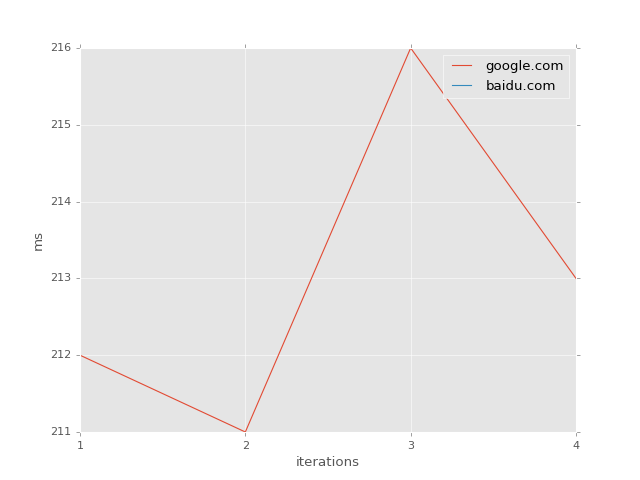

<IPython.core.display.Javascript object>


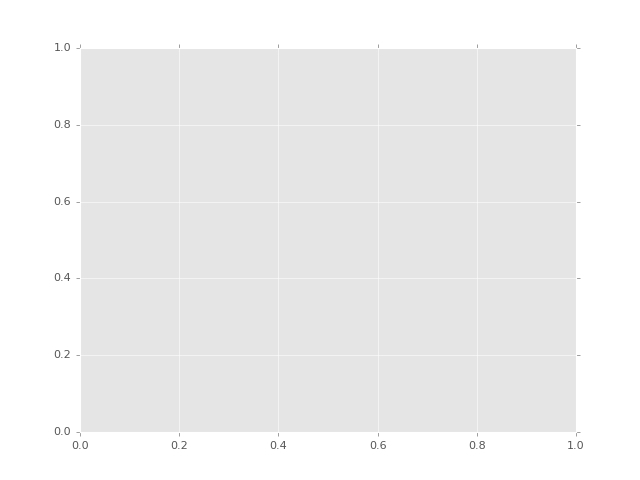

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [1]:
%matplotlib notebook
import pandas as pd  
import matplotlib.pyplot as plt  
from ipywidgets import *  
from IPython.display import display  
import ipywidgets as widgets  
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

#displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)  
display(text)

#preparing the plot 
data = pd.DataFrame()  
x = range(1,NUMBER_OF_PINGS+1)  
plots = dict()  
fig, ax = plt.subplots()  
plt.xlabel('iterations')  
plt.ylabel('ms')  
plt.xticks(x)  
plt.show()

#preparing a container to put in created checkbox per domain
checkboxes = []  
cb_container = widgets.HBox()  
display(cb_container)

#add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

#function to deal with the added domain name
def handle_submit(sender):  
    #a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print ("Domain gave error on pinging")
    else:
         #rebuild plot based on ping result
        data[text.value] = hits
        data[text.value] = data[text.value].astype(float)
        plots[text.value], = ax.plot(x, data[text.value], label=text.value)
        plt.legend()
        plt.draw()
        #add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

#function to deal with the checkbox update button       
def on_button_clicked(b):  
    for c in cb_container.children:
        if not c.value:
            plots[c.description].set_visible(False)
        else:
            plots[c.description].set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)  
text.on_submit(handle_submit)  
plt.show()

In [18]:
from ipywidgets import *
from IPython.display import display
from time import sleep
w = None
def f(a=0,b=0,c=False,d='2',e='44',f=Select):
    #argv['c'] = False
    #print(w.children[0].value)
    return locals()
w = interactive(f, a=(1,2,0.01),b=(3,4,0.001), d='', e='',f = locals(),_manual=True)
w

{'a': 1.0,
 'b': 3.0,
 'c': False,
 'd': '',
 'e': '',
 'f': ipywidgets.widgets.widget_selection.Select}

In [2]:


x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget)



0.0 5.0


<function __main__.printer>

In [3]:
from traitlets import link
a = FloatText()
b = FloatSlider()
display(a,b)

mylink = link((a, 'value'), (b, 'value'))